In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src.eval import calculate_rouge

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/mila/f/floresl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mila/f/floresl/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/mila/f/floresl/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv("data/flores/test.csv")

scores2 = np.fromfile("results/checkpoint-300_flores_scores")
with open("results/checkpoint-300_flores_sentences") as file:
    texts2 = [line.rstrip() for line in file]

In [3]:
metric2 = list[float]()
for pred, label in zip(texts2, df["target"]):
    bleu = calculate_rouge(predictions=[pred], references=[[label]])["rougeL"]
    metric2.append(bleu)

In [4]:
df_score = pd.DataFrame(
    {
        "bleu_2": metric2,
        "cert_2": scores2,
    }
)

In [8]:
np.corrcoef(df_score["bleu_2"], df_score["cert_2"])

array([[1.       , 0.5190081],
       [0.5190081, 1.       ]])

Text(0, 0.5, 'BLEU')

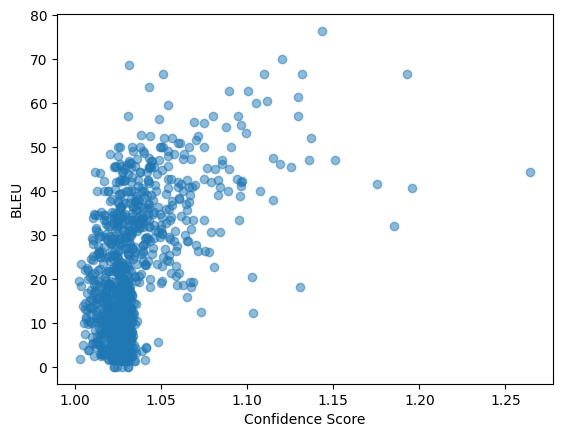

In [9]:
plt.scatter(y=df_score["bleu_2"], x=df_score["cert_2"], alpha=0.5)
plt.xlabel("Confidence Score")
plt.ylabel("BLEU")

In [7]:
# plt.scatter(
#     y=df_score["bleu_2"] - df_score["bleu_1"], x=df_score["cert_2"] - df_score["cert_1"]
# )
# plt.vlines(x=0, ymin=-40, ymax=40)
# plt.hlines(y=0, xmin=-0.8, xmax=0.6)